In [81]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

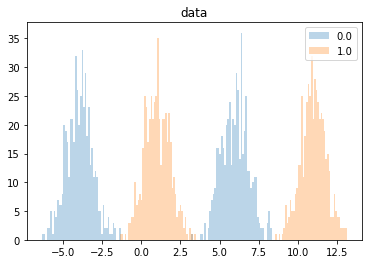

In [82]:
# X_ = np.concatenate([
#     np.random.normal(-2., 0.8,  500),
#     np.random.normal( 1., 1.0, 1000),
#     np.random.normal( 4., 1.2,  500),
# ])

# X_ = np.concatenate([
#     np.random.normal(-4., .8,  500),
#     np.random.normal( 1., .8, 1000),
#     np.random.normal( 6., .8,  500),
# ])

X_ = np.concatenate([
    np.random.normal(-4., .8, 500),
    np.random.normal( 1., .8, 500),
    np.random.normal( 6., .8, 500),
    np.random.normal(11., .8, 500),
])

y_ = np.concatenate([
    np.zeros(500),
    np.ones(500),
    np.zeros(500),
    np.ones(500),
])

plt.title('data')
for unique_y in set(y_):
    plt.hist(X_[y_==unique_y], histtype='stepfilled', alpha=.3, bins=int(X_[y_==unique_y].max()-X_[y_==unique_y].min())*10, label=f'{unique_y}')
plt.legend()
plt.show()

In [83]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_0 = nn.Linear(in_features=1, out_features=2, bias=True)
        self.linear_1 = nn.Linear(in_features=2, out_features=2, bias=True)
        self.linear_2 = nn.Linear(in_features=2, out_features=2, bias=True)
        self.linear_3 = nn.Linear(in_features=2, out_features=1, bias=False)
        # self.NL = nn.ReLU()
        self.NL = nn.Mish()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.linear_0(x)
        x = self.NL(x)
        x = self.linear_1(x)
        x = self.NL(x)
        x = self.linear_2(x)
        x = self.NL(x)
        x = self.linear_3(x)
        x = self.sigmoid(x)
        return x

X = torch.FloatTensor(X_)
y = torch.FloatTensor(y_)

model = NeuralNetwork()

In [84]:
optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()
epoch = 4000
for e in range(epoch):
    optimizer.zero_grad()
    output = model(X.unsqueeze(1))
    loss = criterion(output.flatten(), y)
    loss.backward()
    optimizer.step()

    if e % 500 == 499:
        print(f'[epoch {e}]', loss)

[epoch 499] tensor(0.1815, grad_fn=<MseLossBackward0>)
[epoch 999] tensor(0.0123, grad_fn=<MseLossBackward0>)
[epoch 1499] tensor(0.0044, grad_fn=<MseLossBackward0>)
[epoch 1999] tensor(0.0028, grad_fn=<MseLossBackward0>)
[epoch 2499] tensor(0.0021, grad_fn=<MseLossBackward0>)
[epoch 2999] tensor(0.0018, grad_fn=<MseLossBackward0>)
[epoch 3499] tensor(0.0016, grad_fn=<MseLossBackward0>)
[epoch 3999] tensor(0.0014, grad_fn=<MseLossBackward0>)


In [85]:
Z_1 = model.linear_0.weight @ X.unsqueeze(0) + model.linear_0.bias.view(-1, 1)
H_1 = model.NL(Z_1)
Z_2 = model.linear_1.weight @ H_1 + model.linear_1.bias.view(-1, 1)
H_2 = model.NL(Z_2)
Z_3 = model.linear_2.weight @ H_2 + model.linear_2.bias.view(-1, 1)
H_3 = model.NL(Z_3)
Z_4 = model.linear_3.weight @ H_3
H_4 = model.sigmoid(Z_4)


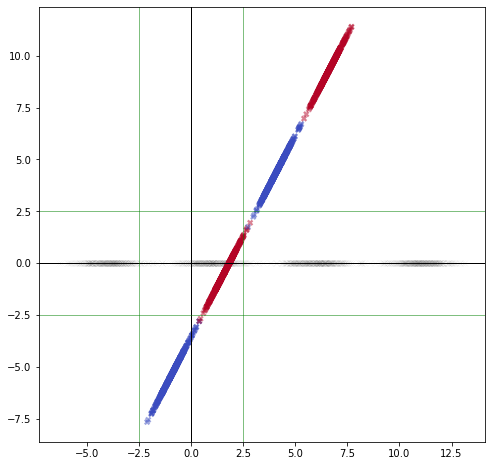

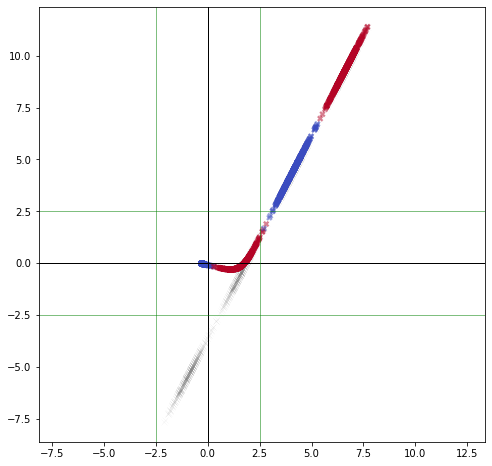

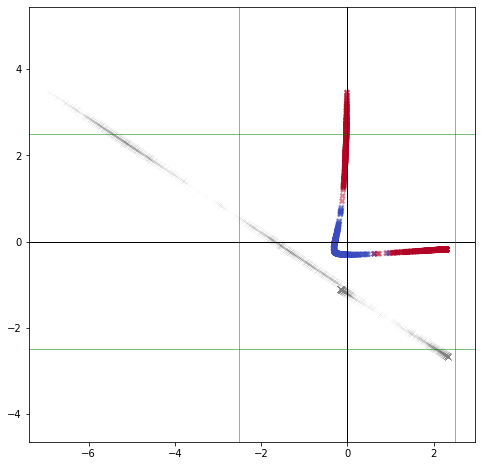

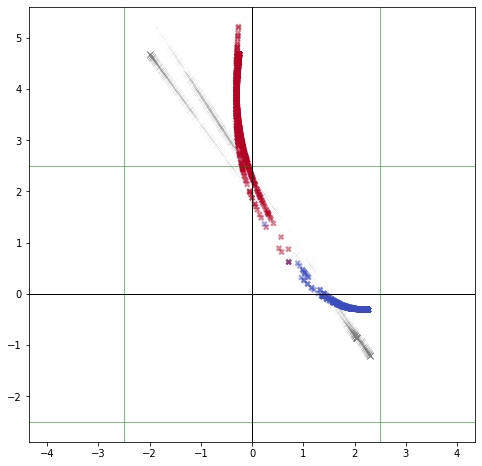

Parameter containing:
tensor([[-2.2937,  1.9870]], requires_grad=True)


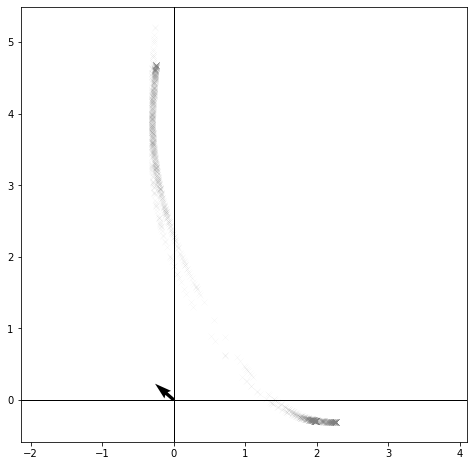

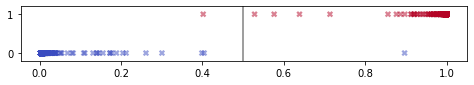

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(X, [0]*len(X), c='grey', cmap='coolwarm', alpha=.3, marker='x', linewidths=.1)
plt.scatter(Z_1[0].tolist(), Z_1[1].tolist(), c=y, cmap='coolwarm', alpha=.5, marker='X', linewidths=.1)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axvline( 2.5, color='green', linewidth=.5)
plt.axhline( 2.5, color='green', linewidth=.5)
plt.axvline(-2.5, color='green', linewidth=.5)
plt.axhline(-2.5, color='green', linewidth=.5)
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(Z_1[0].tolist(), Z_1[1].tolist(), c='grey', cmap='coolwarm', alpha=.3, marker='x', linewidths=.1)
plt.scatter(H_1[0].tolist(), H_1[1].tolist(), c=y, cmap='coolwarm', alpha=.5, marker='X', linewidths=.1)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axvline( 2.5, color='green', linewidth=.5)
plt.axhline( 2.5, color='green', linewidth=.5)
plt.axvline(-2.5, color='green', linewidth=.5)
plt.axhline(-2.5, color='green', linewidth=.5)
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(Z_2[0].tolist(), Z_2[1].tolist(), c='grey', cmap='coolwarm', alpha=.3, marker='x', linewidths=.1)
plt.scatter(H_2[0].tolist(), H_2[1].tolist(), c=y, cmap='coolwarm', alpha=.5, marker='X', linewidths=.1)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axvline( 2.5, color='green', linewidth=.5)
plt.axhline( 2.5, color='green', linewidth=.5)
plt.axvline(-2.5, color='green', linewidth=.5)
plt.axhline(-2.5, color='green', linewidth=.5)
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,8))
plt.scatter(Z_3[0].tolist(), Z_3[1].tolist(), c='grey', cmap='coolwarm', alpha=.3, marker='x', linewidths=.1)
plt.scatter(H_3[0].tolist(), H_3[1].tolist(), c=y, cmap='coolwarm', alpha=.5, marker='X', linewidths=.1)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axvline( 2.5, color='green', linewidth=.5)
plt.axhline( 2.5, color='green', linewidth=.5)
plt.axvline(-2.5, color='green', linewidth=.5)
plt.axhline(-2.5, color='green', linewidth=.5)
plt.axis('equal')
plt.show()

print(model.linear_3.weight)
dx_1, dx_2 = model.linear_3.weight.tolist()[0]

plt.figure(figsize=(8,8))
plt.scatter(H_3[0].tolist(), H_3[1].tolist(), c='grey', cmap='coolwarm', alpha=.3, marker='x', linewidths=.1)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.quiver(0, 0, dx_1, dx_2)
plt.show()

plt.figure(figsize=(8,1))
plt.scatter(H_4[0].tolist(), y, c=y, cmap='coolwarm', alpha=.5, marker='X', linewidths=.1)
plt.ylim([-.2, 1.2])
plt.axvline(x=.5, color='grey')
plt.show()